## **简谐运动**
### **自由简谐运动**
<img src="./Images/Ball-Spring.png" style="width: 600px"/>

如上图所示，一个小球被一根**无质量**弹簧固定在**光滑**地面上。此时，小球在水平方向上只受到弹簧伸缩引起的正比于偏离平衡位置距离的回复力。

我们可以写出小球的运动方程 \
$$\frac{\partial^2 x}{\partial t^2} + \omega^2 x = 0$$ 
这个运动方程存在精确解析解 \
$$x=Acos(\omega t + \phi)$$ 
在设定振幅$A$、频率$\omega$和初始相位$\phi$后，我们可以画出这个函数的图像

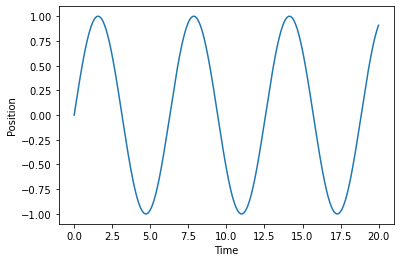

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return A*np.cos(omega*t + phi)

A = 1
phi = -np.pi/2  # 初始相位
omega = 1  # 频率
delta_t = 0.01 # 时间步长
max_t = 20
t = np.arange(0, max_t,delta_t)
x = f(t)
# 作图
plt.plot(t,x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

从工程的角度出发，特定系统精确的解析解可能难以获得，或者是需要进行模型简化。例如，上述理想模型中我们就忽略了弹簧质量、摩擦、阻尼等诸多要素）。 
#### **如何使用计算机解决该问题？**
基于**虎克定律**和**牛顿第二定律**，我们可以使用数值迭代法求解上述微分方程，从而计算出小球位置随时间的变化关系。 \
具体算法如下： \
$$x(t+\Delta t)=x(t)+v(t)\Delta t$$ \
$$v(t+\Delta t)=v(t)+a(t)\Delta t$$ \
$$a(t+\Delta t)=-x(t)\frac{k}{m}$$

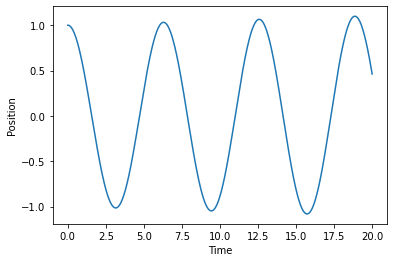

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 每个迭代步中同步更新位置、速度和加速度
def iterate(delta_t):
    global acceleration, position, velocity
    force = -k * position # 虎克定律
    acceleration = force / m # 牛顿第二定律
    position = position + velocity * delta_t
    velocity = velocity + acceleration * delta_t    
    return

k = 1 # 弹性系数
m = 1 # 质量
delta_t = 0.01 # 时间步长
max_t = 20 # 模拟总时长
steps = int(max_t / delta_t) # 迭代次数

x = np.zeros(steps) # 位置坐标
t = np.arange(0, max_t, delta_t) # 时间坐标

# 模拟开始
velocity = 0 # 初始速度
position = 1 # 初始位置
for i in range(steps):
    x[i] = position
    iterate(delta_t)

# 作图
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

所得模拟结果和解析结果一致，我们成功得到了一个描述球簧运动的**模拟仿真**程序。

#### **讨论**：
时间步长的选择对数值迭代法的稳定性的影响，即误差的传播和扩大问题。
#### **拓展阅读**：
求解微分方程的[欧拉法](https://zh.wikipedia.org/wiki/%E6%AC%A7%E6%8B%89%E6%96%B9%E6%B3%95)和[龙格-库塔法](https://zh.wikipedia.org/wiki/%E9%BE%99%E6%A0%BC%EF%BC%8D%E5%BA%93%E5%A1%94%E6%B3%95)

ToDo 泰勒展开 \
force = -k * np.sin(position) # 虎克定律

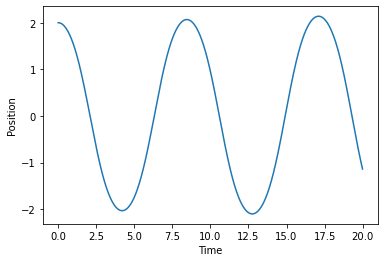

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# 每个迭代步中同步更新位置、速度和加速度
def iterate(delta_t):
    global acceleration, position, velocity
    force = -k * np.sin(position) # 虎克定律
    acceleration = force / m # 牛顿第二定律
    position = position + velocity * delta_t
    velocity = velocity + acceleration * delta_t    
    return

k = 1 # 弹性系数
m = 1 # 质量
delta_t = 0.01 # 时间步长
max_t = 20 # 模拟总时长
steps = int(max_t / delta_t) # 迭代次数

x = np.zeros(steps) # 位置坐标
t = np.arange(0, max_t, delta_t) # 时间坐标

# 模拟开始
velocity = 0 # 初始速度
position = 2 # 初始位置
for i in range(steps):
    x[i] = position
    iterate(delta_t)

# 作图
plt.plot(t, x)
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

### **阻尼简谐运动**
小球除了受到弹簧力，还受到一个与运动速度成正比且方向相反的阻尼力。

#### **使用数值法模拟计算小球位置随时间的变化关系：**

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import AppLayout, FloatSlider

def iterate(damping, delta_t):
    global acceleration, position, velocity
    force = -k * position -damping * velocity
    acceleration = force / m
    position = position + velocity * delta_t
    velocity = velocity + acceleration * delta_t    
    return

def update(damping, steps, delta_t):
    global acceleration, position, velocity
    position = 1
    velocity = 0
    x = np.zeros(steps)
    for i in range(steps):
        x[i] = position
        iterate(damping, delta_t)
    return x


k = 1
m = 1
delta_t = 0.005
max_t = 20
steps = int(max_t / delta_t)

plt.ioff()
slider = FloatSlider(orientation='horizontal', description='Damping:', value=0.1, min=0.0, max=2.0)
fig = plt.figure()
fig.canvas.header_visible = False
t = np.arange(0, max_t, delta_t)
x = update(slider.value, steps, delta_t)
lines = plt.plot(t, x)
def update_lines(change):
    x = update(change.new, steps, delta_t)
    lines[0].set_data(t, x)
    fig.canvas.draw()
    fig.canvas.flush_events()
slider.observe(update_lines, names='value')
AppLayout(
    center=fig.canvas,
    header=slider,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(FloatSlider(value=0.1, description='Damping:', layout=Layout(grid_area='header'), max=2.0)…

上述模拟结果和用解析法预测一致。 \
运动方程 $$\frac{\partial^2 x}{\partial t^2} + damping * \frac{\partial x}{\partial t} + \omega^2 x = 0 $$
的解为 $$x=Ae^{\frac{-damping}{2}t}cos(\omega t + \phi)$$
求解过程可以参考搜索引擎 [WolframAlpha](https://www.wolframalpha.com/input/?i=y%27%27+%2B+ay%E2%80%98%2Bby+%3D+0)

### **受迫简谐运动**
<img src="./Images/ForcedSHM.png" style="width: 600px"/>
弹簧左端固定在一个运动物体上，物体在做角频率为$𝜔_0$，振幅为$𝐴$的简谐运动。

#### **使用数值法模拟计算小球位置随时间的变化关系：**

In [5]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import AppLayout, FloatSlider, IntSlider

def iterate(num_atom, delta_t):
    global acceleration, position, velocity
    for i in range(1,num_atom):
        if i == num_atom-1:
            force = -k * (position[i] - position[i-1])
        else:
            force = -k * (position[i] - position[i-1]) + k * (position[i+1] - position[i])
        acceleration[i] = force / m
        position[i] = position[i] + velocity[i] * delta_t
        velocity[i] = velocity[i] + acceleration[i] * delta_t    
    return

def update(freq, num_atom, steps, delta_t):
    global acceleration, position, velocity
    position = np.zeros(num_atom)
    velocity = np.zeros(num_atom)
    acceleration = np.zeros(num_atom)
    x = np.zeros((num_atom, steps))
    for i in range(steps):
        position[0] = np.sin(freq*delta_t*i)
        x[:,i] = position
        iterate(num_atom, delta_t)
    return x[-1,:]

k = 1
m = 1
num_atom = 2

delta_t = 0.01
max_t = 40
steps = int(max_t / delta_t)

plt.ioff()
slider = FloatSlider(orientation='horizontal', description='Freq:', value=1, min=0.1, max=5)
fig = plt.figure()
fig.canvas.header_visible = False
t = np.arange(0, max_t, delta_t)
x = update(slider.value, num_atom, steps, delta_t)
lines = plt.plot(t, x)
def update_lines(change):
    x = update(change.new, num_atom, steps, delta_t)
    lines[0].set_data(t, x)
    fig.canvas.draw()
    fig.canvas.flush_events()
slider.observe(update_lines, names='value')
AppLayout(
    center=fig.canvas,
    header=slider,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(FloatSlider(value=1.0, description='Freq:', layout=Layout(grid_area='header'), max=5.0, mi…

- 当激励频率小于本征振动频率时，振幅表现为激励振动和本征振动的线性组合。
- 当激励频率接近本征振动频率时，振幅随时间指数增大。
- 当激励频率大于本征振动频率时，振幅随着激励频率升高而减小（低通滤波）。

当共振发生时，小球振幅随时间变化如下：
$$x=C_1cos(\omega t + \phi)-\frac{\omega A t}{2}cos(\omega t)$$

## **简谐运动的传播**
### **珠簧链模型**
<img src="./Images/AtomicChain.jpg" style="width: 600px"/>

首先考虑一个半无限长珠簧链，其中第一个小球做角频率为$𝜔_0$=1，振幅为$𝐴$简谐运动。
#### **使用数值迭代法模拟计算前4个小球位置随时间的变化关系：**

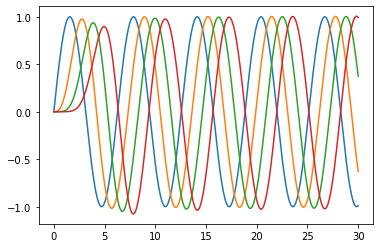

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def iterate(delta_t):
    for i in range(1,num_atom):
        global acceleration, position, velocity
        if i == num_atom-1:
            force = -k * (position[i] - position[i-1])
        else:
            force = -k * (position[i] - position[i-1]) + k * (position[i+1] - position[i])
        acceleration[i] = force / m
        position[i] = position[i] + velocity[i] * delta_t
        velocity[i] = velocity[i] + acceleration[i] * delta_t    
    return

k = 1
m = 1
num_atom = 20
position = np.zeros(num_atom)
velocity = np.zeros(num_atom)
acceleration = np.zeros(num_atom)

delta_t = 0.005
max_t = 30
steps = int(max_t / delta_t)
t = np.arange(0, max_t, delta_t)

freq = 1
x = np.zeros((num_atom, steps))
for i in range(steps):
    position[0] = np.sin(freq*delta_t*i)
    x[:,i] = position
    iterate(delta_t)
    
plt.plot(t[:],x[0,:])
plt.plot(t[:],x[1,:])
plt.plot(t[:],x[2,:])
plt.plot(t[:],x[3,:])

这里可以发现，链上每一个小球的运动都是上一个小球运动形式的简单重复，二者仅仅存在一个相位差。 \
#### **频率对机械波传播的影响**  
增加第一个小球角频率$𝜔_0$=3，使其大于本征振动频率$𝜔$=1，前4个小球位置随时间的变化如下：

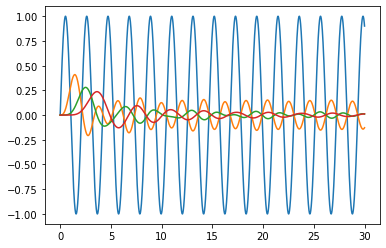

In [7]:
position = np.zeros(num_atom)
velocity = np.zeros(num_atom)
acceleration = np.zeros(num_atom)

freq = 3
t = np.arange(0, max_t, delta_t)
x = np.zeros((num_atom, steps))
for i in range(steps):
    position[0] = np.sin(freq*delta_t*i)
    x[:,i] = position
    iterate(delta_t)
    
plt.plot(t[:],x[0,:])
plt.plot(t[:],x[1,:])
plt.plot(t[:],x[2,:])
plt.plot(t[:],x[3,:])

可以看到，激励频率大于本征频率时，机械能的传播被阻止了。 \
下面我们具体观察一下第10个小球振幅随频率的变化：

In [8]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
def iterate(delta_t):
    for i in range(1,num_atom):
        global acceleration, position, velocity
        if i == num_atom-1:
            force = -k * (position[i] - position[i-1])
        else:
            force = -k * (position[i] - position[i-1]) + k * (position[i+1] - position[i])
        acceleration[i] = force / m
        position[i] = position[i] + velocity[i] * delta_t
        velocity[i] = velocity[i] + acceleration[i] * delta_t    
    return

def update(freq, steps, delta_t):
    global acceleration, position, velocity
    position = np.zeros(num_atom)
    velocity = np.zeros(num_atom)
    acceleration = np.zeros(num_atom)
    x = np.zeros((num_atom, steps))
    for i in range(steps):
        position[0] = np.sin(freq*delta_t*i)
        x[:,i] = position
        iterate(delta_t)
    return x


k = 1
m = 1
num_atom = 30
position = np.zeros(num_atom)
velocity = np.zeros(num_atom)
acceleration = np.zeros(num_atom)

delta_t = 0.005
max_t = 30
steps = int(max_t / delta_t)
t = np.arange(0, max_t, delta_t)


plt.ioff()
slider = FloatSlider(orientation='horizontal', description='Frequency:', value=0.1, min=0.0, max=5.0)
fig = plt.figure()
fig.canvas.header_visible = False
t = np.arange(0, max_t, delta_t)
x = update(slider.value, steps, delta_t)
lines = plt.plot(t, x[9,:])
def update_lines(change):
    x = update(change.new, steps, delta_t)
    lines[0].set_data(t, x[9,:])
    fig.canvas.draw()
    fig.canvas.flush_events()
slider.observe(update_lines, names='value')
AppLayout(
    center=fig.canvas,
    header=slider,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(FloatSlider(value=0.1, description='Frequency:', layout=Layout(grid_area='header'), max=5.…

可以看到，当激励频率较大时，系统内只存在固定频率的低频信号存在。